##  Week4 복습과제

Week3에 대한 복습과제입니다.  
데이터셋(train.csv, mushrooms.csv)을 다운 받아주세요!

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### 'train.csv'으로 train_df를 생성하세요.

In [61]:
train_df = pd.read_csv('week5_train.csv')  # 데이터를 저장할 때, train 데이터를 week5_trian으로 변경하여 저장하였습니다.
train_df.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,color,type
0,0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul
1,1,0.575560,0.425868,0.531401,0.439899,green,Goblin
2,2,0.467875,0.354330,0.811616,0.791225,black,Ghoul
3,4,0.776652,0.508723,0.636766,0.884464,black,Ghoul
4,5,0.566117,0.875862,0.418594,0.636438,green,Ghost


#### 데이터 보정을 위해 다음 코드를 실행시켜 주세요.

In [62]:
# id 제외

train_df = train_df.drop("id", axis = 1)

#### LabelEncoder를 사용해 color, type column을 인코딩한 train_df를 만드시오.

In [63]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
train_df['color'] = encoder.fit_transform(train_df['color']) 
train_df['type'] = encoder.fit_transform(train_df['type']) 
train_df.head()

,bone_length,rotting_flesh,hair_length,has_soul,color,type
0,0.354512,0.350839,0.465761,0.781142,3,1
1,0.575560,0.425868,0.531401,0.439899,4,2
2,0.467875,0.354330,0.811616,0.791225,0,1
3,0.776652,0.508723,0.636766,0.884464,0,1
4,0.566117,0.875862,0.418594,0.636438,4,0


#### feature간의 상관관계를 확인하는 heatmap을 출력하시오.

<AxesSubplot:>

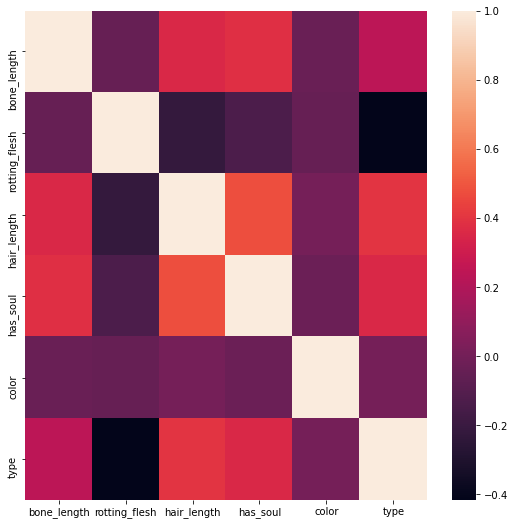

In [64]:
import seaborn as sns

plt.figure(figsize=(9,9))
corr = train_df.corr()
sns.heatmap(corr)

#### 독립변수(X)와 종속변수(y-type)로 분리해주세요(iloc 또는 loc 활용) 그리고 확인해주세요.
#### X와 y를 X_train, X_test, y_train, y_test으로 나누시오. (test_size=0.2, random_state=12) 

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X = train_df.iloc[:,:-1]
y = train_df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)

#### Gradient Boost를 활용하여 train 세트를 fit 한 후 test 세트로 예측의 정확도를 출력하시오. (random_state=0,n_estimators=50,learning_rate=0.5)


In [67]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [68]:
gb_clf = GradientBoostingClassifier(random_state=0, n_estimators=50,learning_rate=0.5)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print("GBM 정확도 : {0:4f}".format(gb_accuracy))

GBM 정확도 : 0.706667


#### GBM 하이퍼 파라미터 튜닝을 한 후, 최적의 하이퍼 파라미터를 구하고 정확도를 출력하시오. 위의 값과 정확도를 비교하시오. 이때 n_estimators는 50,100,500, learning_rate는 0.005, 0.1, 0.5,1,10 을 변수로 넣으시오.(gridsearchCV이용,cv=2,verbose=1)

In [69]:
from sklearn.model_selection import GridSearchCV
params =  {
    'n_estimators' : [50,100,500],
    'learning_rate' : [0.005, 0.1, 0.5,1,10]
}

grid_cv = GridSearchCV(gb_clf, param_grid=params, scoring='accuracy', cv = 2, verbose=1)
grid_cv.fit(X_train,y_train)
print('GridSearchCV 최고 평균 정확도 수치 : {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터 : ', grid_cv.best_params_)

Fitting 2 folds for each of 15 candidates, totalling 30 fits
GridSearchCV 최고 평균 정확도 수치 : 0.7095
GridSearchCV 최적 하이퍼 파라미터 :  {'learning_rate': 0.005, 'n_estimators': 500}


#### 사이킷런 래퍼 클래스 XGBoost를 사용해 train 세트를 fit 한 후 test 세트로 예측의 정확도를 출력하시오. (n_estimators=400, learning_rate = 0.1, max_depth = 3)

In [70]:
import xgboost as xgb
from xgboost import plot_importance
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score

In [72]:
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate = 0.1, max_depth = 3)
xgb_wrapper.fit(X_train, y_train)
w_preds = xgb_wrapper.predict(X_test)
w_pred_proba =xgb_wrapper.predict_proba(X_test)[:,1]
xgb_accuracy = accuracy_score(y_test, w_preds)
print("정확도 :",xgb_accuracy)

정확도 : 0.68


#### 사이킷런 래퍼 클래스 LightGBM를 사용해 train 세트를 fit 한 후 test 세트로 예측의 정확도를 출력하시오. 

n_estimators=400
조기 중단 파라미터: early_stopping_rounds=100, eval_metric="logloss",  eval_set=evals 

In [73]:
import lightgbm
from lightgbm import LGBMClassifier
lgbm_wrapper = LGBMClassifier(n_estimators=400 )

evals = [(X_test, y_test)]
lgbm_wrapper.fit(X_train,y_train,early_stopping_rounds=100, eval_metric="logloss", eval_set=evals)
lgbm_preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:,1]
lgbm_accuracy = accuracy_score(y_test, lgbm_preds)
print("정확도 :",lgbm_accuracy)

[1]	valid_0's multi_logloss: 1.04658
[2]	valid_0's multi_logloss: 0.991864
[3]	valid_0's multi_logloss: 0.961098
[4]	valid_0's multi_logloss: 0.922715
[5]	valid_0's multi_logloss: 0.889621
[6]	valid_0's multi_logloss: 0.860335
[7]	valid_0's multi_logloss: 0.838603
[8]	valid_0's multi_logloss: 0.823945
[9]	valid_0's multi_logloss: 0.808374
[10]	valid_0's multi_logloss: 0.794635
[11]	valid_0's multi_logloss: 0.787051
[12]	valid_0's multi_logloss: 0.779236
[13]	valid_0's multi_logloss: 0.772983
[14]	valid_0's multi_logloss: 0.764275
[15]	valid_0's multi_logloss: 0.752906
[16]	valid_0's multi_logloss: 0.746936
[17]	valid_0's multi_logloss: 0.748563
[18]	valid_0's multi_logloss: 0.744367
[19]	valid_0's multi_logloss: 0.743001
[20]	valid_0's multi_logloss: 0.73754
[21]	valid_0's multi_logloss: 0.73435
[22]	valid_0's multi_logloss: 0.730277
[23]	valid_0's multi_logloss: 0.729156
[24]	valid_0's multi_logloss: 0.727211
[25]	valid_0's multi_logloss: 0.73012
[26]	valid_0's multi_logloss: 0.729092

## Stacking 실습

CV set 기반 stacking을 통해 앙상블 모델을 만드려고 합니다.    
개별 모델이 교차검증을 통해 최종 모델이 사용할 학습용, 테스트용 데이터를 만드는 함수를 생성하시오.
```
def get_stacking_dataset(model, X_train, y_train, X_test, n_folds):
    return train_fold_pred , test_pred_mean
```

In [85]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [109]:
def get_stacking_datasets(model, X_train, y_train, X_test, n_folds):
    kfold = KFold(n_splits=n_folds, shuffle=False)
    train_meta = np.zeros((X_train.shape[0] ,1 ))
    test_meta = np.zeros((X_test.shape[0],n_folds))
    
    for fold_cnt, (train_index, valid_index) in enumerate(kfold.split(X_train)):
        X_tr = X_train[train_index] 
        y_tr = y_train[train_index] 
        X_val = X_train[valid_index]
        
        model.fit(X_tr, y_tr)
        train_meta[valid_index, :] = model.predict(X_val).reshape(-1,1)
        test_meta[:, fold_cnt] = model.predict(X_test)
    test_meta = np.mean(test_meta, axis=1).reshape(-1,1)    
    return train_meta, test_meta

스태킹에 사용될 개별 모델을 생성하시오.

개별 모델:  KNN(n_neighbors=4), 랜덤 포레스트(n_estimators=100, random_state=0), 결정 트리, AdaBoost(n_estimators=100), LightGBM(n_estimators=400)

최종 모델: 로지스틱 회귀 (C=10)

In [115]:
knn_clf = KNeighborsClassifier(n_neighbors=4)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0)
dt_clf = DecisionTreeClassifier()
ada_clf = AdaBoostClassifier(n_estimators=100)
lgbm_clf = LGBMClassifier(n_estimators=400)

lr_meta = LogisticRegression(C=10)

위에서 생성한 함수를 사용해 개별 모델을 학습, 예측시켜 메타모델에 사용될 학습용 데이터와 테스트용 데이터를 생성하고, 스태킹하시오.  
fold 수 = 6  
학습용 데이터 : stacked_X_train  
테스트용 데이터 : stacked_X_test

In [116]:
# 계속 오류가 나는 데 원인을 못 찾겠습니다...!
knn_train, knn_test = get_stacking_datasets(knn_clf, X_train, y_train, X_test, 6)
rf_train, rf_test = get_stacking_datasets(rf_clf, X_train, y_train, X_test, 6)
dt_train, dt_test = get_stacking_datasets(dt_clf, X_train, y_train, X_test, 6)
ada_train, ada_test = get_stacking_datasets(ada_clf, X_train, y_train, X_test, 6)
lgbm_train, lgbm_test = get_stacking_datasets(lgbm_clf, X_train, y_train, X_test, 6)

KeyError: "None of [Int64Index([ 50,  51,  52,  53,  54,  55,  56,  57,  58,  59,\n            ...\n            286, 287, 288, 289, 290, 291, 292, 293, 294, 295],\n           dtype='int64', length=246)] are in the [columns]"

In [117]:
stacked_X_train = np.concatenate((dt_train, knn_train, rf_train, ada_train,lgbm_train),axis=1)
stacked_X_test = np.concatenate((dt_test, knn_test, rf_test, ada_test,lgbm_test),axis=1)

print("원본 학습 피처 데이터 Shape:", X_train.shape, "원본 테스트 피처 Shape:",X_test.shape)
print("스태킹 학습 피처 데이터 Shape:",stacked_X_train.shape,
     "스태킹 테스트 피처 데이터 Shape:",stacked_X_test.shape)

NameError: name 'dt_train' is not defined

최종 모델 (logistic regression)을 학습시키고, 정확도를 구하시오.

In [118]:
lr_meta.fit(stacked_X_train,y_train)
pred_meta = lr_meta.predict(stacked_X_test)

print('최종 메타 모델의 예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred_meta)))

NameError: name 'stacked_X_train' is not defined

### CatBoost

범주형 변수가 많은 데이터에 catboost를 적용해봅시다.

데이터 출처:
https://www.kaggle.com/datasets/uciml/mushroom-classification


In [37]:
# mushrooms.csv 파일을 사용합니다.

mushroom_df = pd.read_csv('week5_mushrooms.csv')
mushroom_df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


mushroom_df feature들의 data type을 확인하시오.

In [40]:
mushroom_df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

feature와 target을 각각 X_mushroom, y_mushroom으로 분리하고,  
train_test_split 함수로 train, test set을 분리하시오. (test size = 0.2)

In [43]:
X_mushroom = train_df.iloc[:,:-1]
y_mushroom = train_df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X_mushroom, y_mushroom, test_size = 0.2)

CatBoostClassifier를 불러오고, Pool 함수를 이용해 범주형 변수를 처리하도록 train_pool, test_pool을 만드시오.

In [47]:
!pip install catboost

In [52]:
from catboost import Pool

In [53]:
train_pool = Pool(data = X_train, label= y_train)
test_pool = Pool(data = X_test, label = y_test)

iteration=400, learning_rate=0.1, max_depth=3로 설정한 CatBoost 모델로 버섯에 대한 정보를 학습하고 테스트 데이터 버섯의 독성 여부를 예측하시오. 또 정확도를 구하시오.  

In [58]:
from catboost import CatBoostClassifier

cb_clf = CatBoostClassifier(iterations=400, learning_rate=0.1, max_depth=3)
cb_clf.fit(train_pool)
pred = cb_clf.predict(test_pool)
pred_prob = cb_clf.predict_proba(test_pool)[:,1]
cb_accuracy = accuracy_score(y_test, pred)
print("정확도 :",cb_accuracy)

0:	learn: 1.0447321	total: 804us	remaining: 321ms
1:	learn: 0.9960561	total: 1.83ms	remaining: 364ms
2:	learn: 0.9637278	total: 2.74ms	remaining: 362ms
3:	learn: 0.9218655	total: 3.63ms	remaining: 359ms
4:	learn: 0.8890160	total: 4.61ms	remaining: 364ms
5:	learn: 0.8676226	total: 5.68ms	remaining: 373ms
6:	learn: 0.8460663	total: 6.54ms	remaining: 367ms
7:	learn: 0.8215393	total: 7.94ms	remaining: 389ms
8:	learn: 0.8042549	total: 9ms	remaining: 391ms
9:	learn: 0.7840780	total: 9.93ms	remaining: 387ms
10:	learn: 0.7645086	total: 10.7ms	remaining: 378ms
11:	learn: 0.7505316	total: 11.5ms	remaining: 371ms
12:	learn: 0.7334161	total: 12.3ms	remaining: 367ms
13:	learn: 0.7209195	total: 13.1ms	remaining: 361ms
14:	learn: 0.7088780	total: 13.8ms	remaining: 354ms
15:	learn: 0.7002115	total: 14.6ms	remaining: 349ms
16:	learn: 0.6899566	total: 15.4ms	remaining: 348ms
17:	learn: 0.6793074	total: 16.1ms	remaining: 341ms
18:	learn: 0.6672257	total: 16.8ms	remaining: 337ms
19:	learn: 0.6563607	total

204:	learn: 0.2986843	total: 141ms	remaining: 134ms
205:	learn: 0.2979065	total: 141ms	remaining: 133ms
206:	learn: 0.2972355	total: 142ms	remaining: 133ms
207:	learn: 0.2966615	total: 143ms	remaining: 132ms
208:	learn: 0.2961900	total: 144ms	remaining: 131ms
209:	learn: 0.2956833	total: 144ms	remaining: 131ms
210:	learn: 0.2952780	total: 145ms	remaining: 130ms
211:	learn: 0.2948145	total: 146ms	remaining: 129ms
212:	learn: 0.2933907	total: 146ms	remaining: 128ms
213:	learn: 0.2929146	total: 147ms	remaining: 128ms
214:	learn: 0.2923733	total: 147ms	remaining: 127ms
215:	learn: 0.2921470	total: 148ms	remaining: 126ms
216:	learn: 0.2919242	total: 148ms	remaining: 125ms
217:	learn: 0.2913677	total: 149ms	remaining: 124ms
218:	learn: 0.2905483	total: 150ms	remaining: 124ms
219:	learn: 0.2900831	total: 150ms	remaining: 123ms
220:	learn: 0.2894838	total: 151ms	remaining: 122ms
221:	learn: 0.2889013	total: 152ms	remaining: 122ms
222:	learn: 0.2883168	total: 152ms	remaining: 121ms
223:	learn: 

수고하셨습니다!